## 1) mention about problem statement
## 2) talk about columns
## 3)install the modules and required libraries
## 4)Load data set
## 5)understand your data
## 6)EDA
### i)univariate analysis
###  ii)Bi-variate analysis
###  iii)Multivarivate analysis
## 7)check the null-values or missing values
### i)treating the null values(fill with mean or median or mode)
### ii)drop null values if they are less than 5%-10%
## 8)check the duplicates
### i)drop duplicates
## 9)treating the ouliers
### i)check the outliers 
### ii)remove outliers
### iii)make the box plot before and after the outliers
## 10)Feature engineering
### a)
#### i)extract the features
####  ii)create the features
####  iii)select the features
### b)checking the multicoliniarity
#### i)heat map
#### ii)vif technique
### c)transformation
#### i)one hot encoding or label encoding
### d)scaling(min_max_scalar)
## 11)X-y features split
## 12)train test split


## for classification
### 1)apply smote technique
### 2)build the models
####  i)logistic regression
####  ii)decision tree
####  iii)Random forest
#### iV)gradient boost
####  v)ada boost
####  vi)knn
####  vii)svm
####  viii)naive bayes
### 3)Hyper parameter tuning
#### i)cross validation
### 4)deploy the best model in streamlit or flask


## for regression
### 1)apply models
 #### i)linear regression
 #### ii)decision tree
 #### iii)random forest
 #### iv)gradient boost
 #### v)knn
 #### vi)svm

### 2)Hyper parameter tuning
 #### i)cross validation
### 3)deploy the best model in streamlit or flask

## clustering
### 1)apply the models
  #### i)k-means
  #### ii)DBSCAN
  #### iii)Hierachical
### 2)Evaluating Clusters (Silhouette Score, Davies-Bouldin Index, etc.)
### 3)Hyperparameter Tuning (Optimizing Number of Clusters, etc.)

### 4)deploy the best model in streamlit or flask


## for recommendation engine
### Steps for Building a Recommendation Engine:
#### 1.	Loading Data
#### 2.	Data Preprocessing
#### 3.	Exploratory Data Analysis (EDA)
#### 4.	Feature Engineering
#### 5.	Choosing a Recommendation Approach (Collaborative Filtering, Content-Based, Hybrid, etc.)
#### 6.	Building the Recommendation Model
#### 7.	Training the Model
#### 8.	Evaluating the Model (Precision, Recall, RMSE, etc.)
#### 9.	Hyperparameter Tuning
#### 10.	Selecting the Best Model
#### 11.	Model Deployment


## <b><u> Project Title :Bank Customer Segmentation </u></b>

## <b> Problem Description </b>
### <i> Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.</i>
### <i> According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.</i>


## <b> Data Description </b>
### <b>Attribute Information: </b>

* #### TransactionID: A unique identifier for each transaction. This ID distinguishes each transaction in the dataset.

* #### CustomerID: A unique identifier for each customer associated with a particular transaction. This links the transaction to a specific customer.

* #### CustomerDOB: The date of birth of the customer in a DD/MM/YY format. This information can be used to determine the customer's age.

* #### CustGender: The gender of the customer. It indicates whether the customer is male (M) or female (F). There seems to be a missing value for some customers (indicated as NaN).

* #### CustLocation: The location of the customer, indicating the city or area where they reside. For example, "BANDRA E MUMBAI", "MUMBAI", "CHENNAI", etc.

* #### CustAccountBalance: The balance of the customer’s account at the time of the transaction, measured in INR (Indian Rupees). It represents the customer's account balance before the transaction.

* #### TransactionDate: The date on which the transaction occurred, presented in the DD/MM/YY format. This helps track when each transaction took place.

* #### TransactionTime: The exact time when the transaction took place. This is recorded in a numeric format, though the precise time unit isn't clear (it might represent seconds or minutes since the start of the day).

* #### TransactionAmount (INR): The amount of money involved in the transaction, measured in Indian Rupees (INR). This column records the transaction amount for each customer.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [158]:
bank_df=pd.read_csv(r'bank_transactions.csv')
df=bank_df.copy()
data = df.sample(200000)
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
593757,T593758,C8623115,26/8/81,M,GHAZIABAD,66852.55,27/8/16,195844,400.00
196742,T196743,C8120668,26/1/91,M,DELHI,112954.81,8/8/16,81610,1000.00
863746,T863747,C2618517,1/1/1800,M,GURGAON,97305.97,8/9/16,103240,1609.01
950625,T950626,C8413533,10/10/85,F,PATIALA,6801.85,10/9/16,74849,10.01
767563,T767564,C8217690,20/1/79,M,GURGAON,105768.42,1/9/16,82943,3960.00
...,...,...,...,...,...,...,...,...,...
192018,T192019,C6358429,10/6/83,F,NOIDA,51682.19,9/8/16,191929,999.00
476252,T476253,C4450755,5/4/91,M,GURGAON,12676.54,20/8/16,91024,400.00
763731,T763732,C1528081,1/6/80,M,BANGALORE,19923.18,1/9/16,130414,550.00
691042,T691043,C3416036,7/5/89,F,NEW DELHI,31852.44,30/8/16,193807,699.00


In [159]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
593757,T593758,C8623115,26/8/81,M,GHAZIABAD,66852.55,27/8/16,195844,400.00
196742,T196743,C8120668,26/1/91,M,DELHI,112954.81,8/8/16,81610,1000.00
863746,T863747,C2618517,1/1/1800,M,GURGAON,97305.97,8/9/16,103240,1609.01
950625,T950626,C8413533,10/10/85,F,PATIALA,6801.85,10/9/16,74849,10.01
767563,T767564,C8217690,20/1/79,M,GURGAON,105768.42,1/9/16,82943,3960.00


In [160]:
data.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
192018,T192019,C6358429,10/6/83,F,NOIDA,51682.19,9/8/16,191929,999.0
476252,T476253,C4450755,5/4/91,M,GURGAON,12676.54,20/8/16,91024,400.0
763731,T763732,C1528081,1/6/80,M,BANGALORE,19923.18,1/9/16,130414,550.0
691042,T691043,C3416036,7/5/89,F,NEW DELHI,31852.44,30/8/16,193807,699.0
82963,T82964,C8314832,17/11/85,M,KOLKATA,520626.97,1/8/16,83033,500.0


In [161]:
data.shape

(200000, 9)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 593757 to 82963
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            200000 non-null  object 
 1   CustomerID               200000 non-null  object 
 2   CustomerDOB              199370 non-null  object 
 3   CustGender               199781 non-null  object 
 4   CustLocation             199972 non-null  object 
 5   CustAccountBalance       199573 non-null  float64
 6   TransactionDate          200000 non-null  object 
 7   TransactionTime          200000 non-null  int64  
 8   TransactionAmount (INR)  200000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 15.3+ MB


In [163]:
data.dropna(inplace=True)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198712 entries, 593757 to 82963
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            198712 non-null  object 
 1   CustomerID               198712 non-null  object 
 2   CustomerDOB              198712 non-null  object 
 3   CustGender               198712 non-null  object 
 4   CustLocation             198712 non-null  object 
 5   CustAccountBalance       198712 non-null  float64
 6   TransactionDate          198712 non-null  object 
 7   TransactionTime          198712 non-null  int64  
 8   TransactionAmount (INR)  198712 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 15.2+ MB


In [165]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [166]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.987120e+05,198712.000000,1.987120e+05
mean,1.127598e+05,157133.675802,1.588756e+03
std,7.692647e+05,51282.277584,7.472209e+03
min,0.000000e+00,1.000000,0.000000e+00
25%,4.728510e+03,123959.000000,1.600000e+02
50%,1.676970e+04,164234.000000,4.595600e+02
75%,5.689966e+04,200059.000000,1.200000e+03
max,1.150355e+08,235959.000000,1.380003e+06


In [167]:
print(data['TransactionID'].value_counts())

TransactionID
T593758     1
T53750      1
T215469     1
T1033323    1
T486502     1
           ..
T235045     1
T386479     1
T70735      1
T841854     1
T82964      1
Name: count, Length: 198712, dtype: int64


In [168]:
print(data['CustomerID'].value_counts())

CustomerID
C3319336    4
C1911251    4
C6912964    4
C4638126    4
C5723648    3
           ..
C5015268    1
C6826042    1
C1328885    1
C5411387    1
C3416036    1
Name: count, Length: 192230, dtype: int64


In [169]:
data['CustomerID'] = data['CustomerID'].astype('str')

In [170]:
data['CustomerID']

593757    C8623115
196742    C8120668
863746    C2618517
950625    C8413533
767563    C8217690
            ...   
192018    C6358429
476252    C4450755
763731    C1528081
691042    C3416036
82963     C8314832
Name: CustomerID, Length: 198712, dtype: object

In [171]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# **Exploratory data analysis**

In [172]:
Account_Balance = data['CustAccountBalance'].value_counts().reset_index()
Account_Balance.columns = ['CustAccount_Balance', 'Count']
Account_Balance.head()

,CustAccount_Balance,Count
0,0.00,504
1,27021.05,104
2,45856.24,97
3,10238.63,72
4,0.01,72


In [173]:
Account_Balance

,CustAccount_Balance,Count
0,0.00,504
1,27021.05,104
2,45856.24,97
3,10238.63,72
4,0.01,72
...,...,...
87439,87.43,1
87440,247964.59,1
87441,4632.42,1
87442,33111.21,1


In [174]:
Account_Balance.tail()

,CustAccount_Balance,Count
87439,87.43,1
87440,247964.59,1
87441,4632.42,1
87442,33111.21,1
87443,19923.18,1


## univariate analysis

<Axes: title={'center': 'Customer Account Balance Distribution'}, xlabel='CustAccount_Balance', ylabel='Count'>

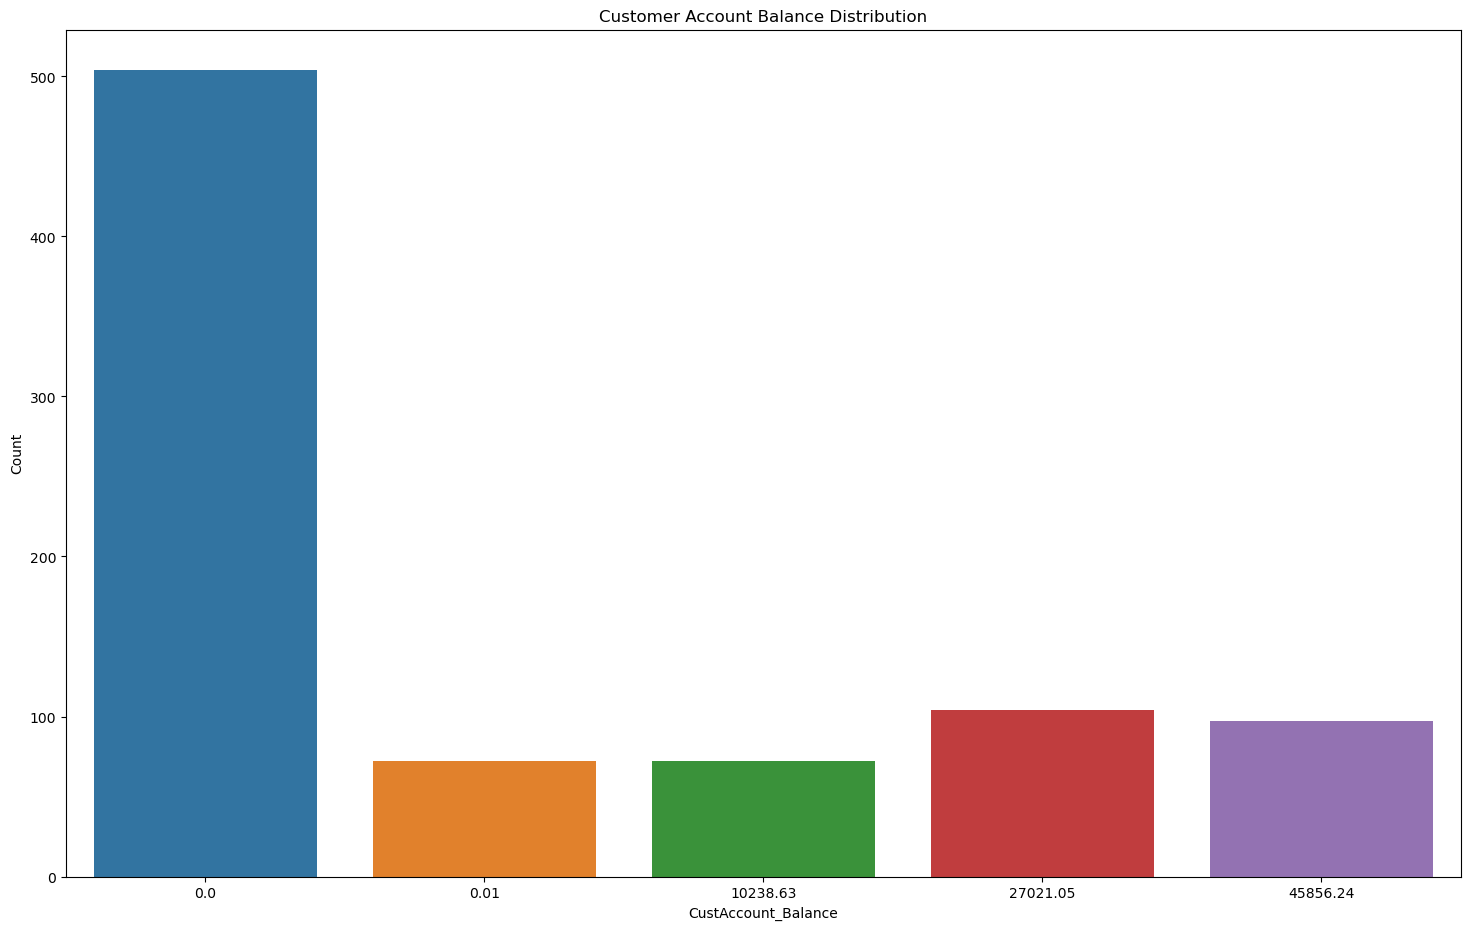

In [175]:
Account_Balance = data['CustAccountBalance'].value_counts().reset_index()
Account_Balance.columns = ['CustAccount_Balance', 'Count']
Account_Balance.head()

# Plot the account balance distribution
plt.figure(figsize=(18,11))
plt.title('Customer Account Balance Distribution')
sns.barplot(x='CustAccount_Balance', y='Count', data=Account_Balance[:5])


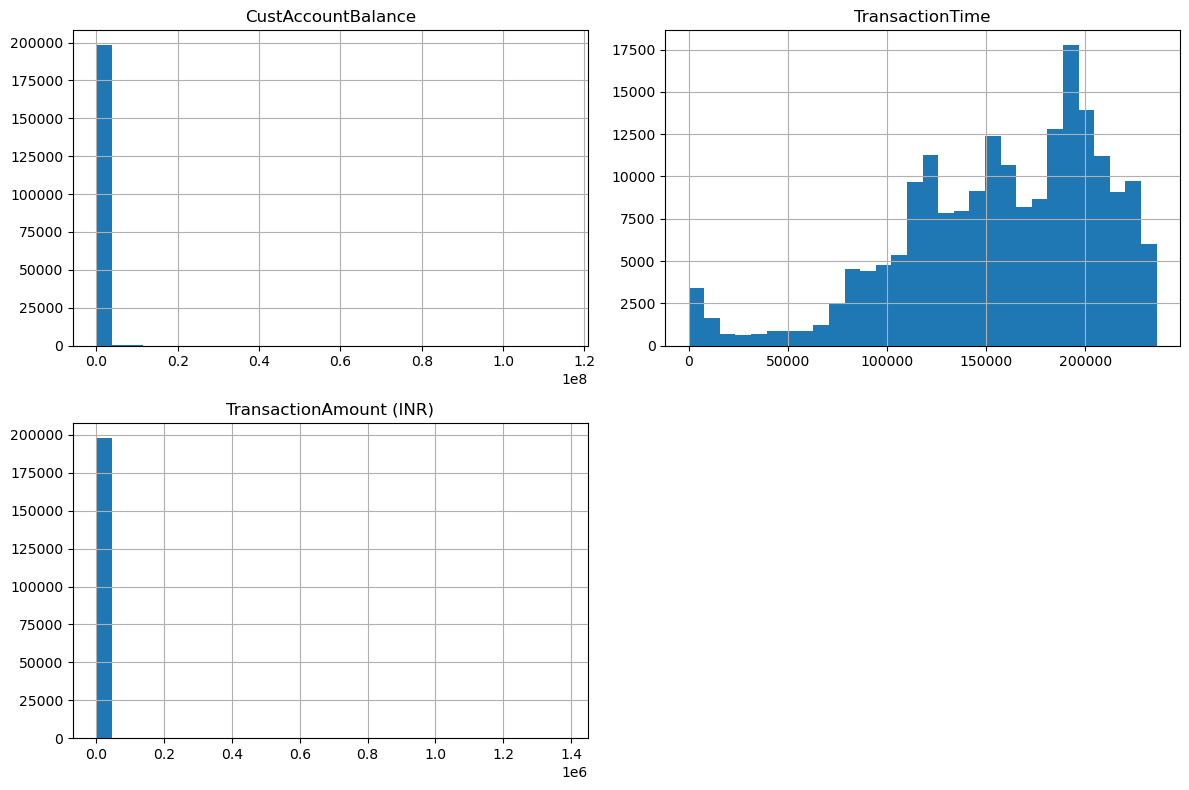

In [176]:
# Plot histogram for transaction amount
data.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()


## Bi-variate analysis

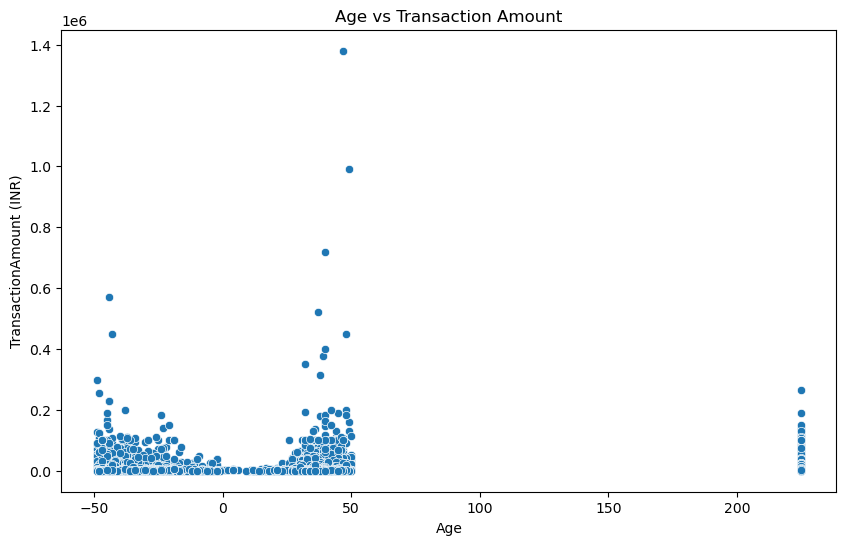

In [177]:
# We need to first calculate the 'Age' feature
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')
data['Age'] = 2025 - data['CustomerDOB'].dt.year

# Fill missing ages with median value
data['Age'].fillna(data['Age'].median(), inplace=True)

# Now, visualize the relationship between Age and TransactionAmount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TransactionAmount (INR)', data=data)
plt.title('Age vs Transaction Amount')
plt.show()


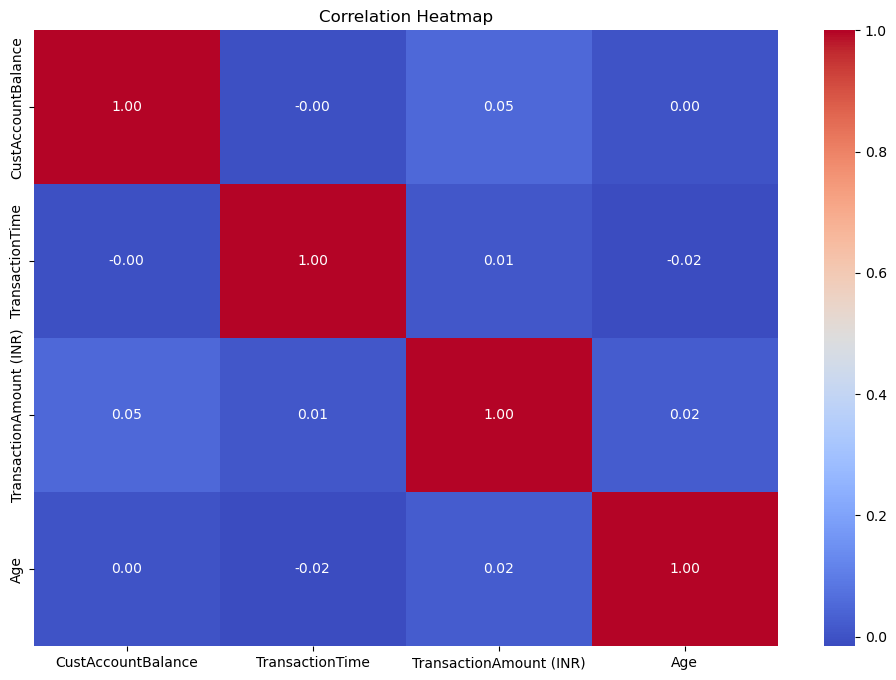

In [178]:
# Filter only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [179]:
# Check for missing values
print(data.isna().sum())

# Drop rows with missing values in critical columns (e.g., Account Balance)
data.dropna(subset=['CustAccountBalance'], inplace=True)

# Alternatively, fill missing values
# data['CustAccountBalance'].fillna(data['CustAccountBalance'].mean(), inplace=True)

# Verify if any missing values exist
print(data.isna().sum())


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64
TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64


In [180]:
# Fill missing gender values with the mode
data['CustGender'].fillna(data['CustGender'].mode()[0], inplace=True)

In [181]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
593757,T593758,C8623115,1981-08-26,M,GHAZIABAD,66852.55,27/8/16,195844,400.00,44
196742,T196743,C8120668,1991-01-26,M,DELHI,112954.81,8/8/16,81610,1000.00,34
863746,T863747,C2618517,1800-01-01,M,GURGAON,97305.97,8/9/16,103240,1609.01,225
950625,T950626,C8413533,1985-10-10,F,PATIALA,6801.85,10/9/16,74849,10.01,40
767563,T767564,C8217690,1979-01-20,M,GURGAON,105768.42,1/9/16,82943,3960.00,46
...,...,...,...,...,...,...,...,...,...,...
192018,T192019,C6358429,1983-10-06,F,NOIDA,51682.19,9/8/16,191929,999.00,42
476252,T476253,C4450755,1991-05-04,M,GURGAON,12676.54,20/8/16,91024,400.00,34
763731,T763732,C1528081,1980-01-06,M,BANGALORE,19923.18,1/9/16,130414,550.00,45
691042,T691043,C3416036,1989-07-05,F,NEW DELHI,31852.44,30/8/16,193807,699.00,36


In [182]:
# Check for duplicate rows
print(data.duplicated().sum())

# Drop duplicates
data.drop_duplicates(inplace=True)

0


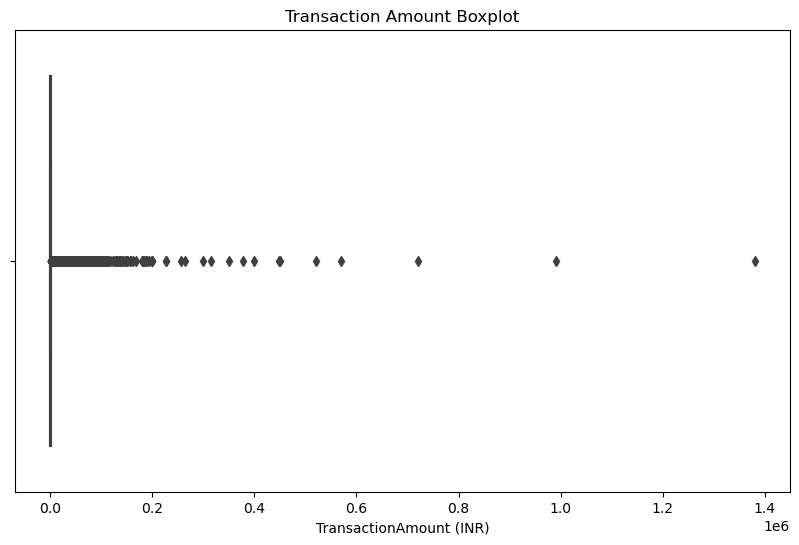

In [183]:
# Plot boxplot for TransactionAmount to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['TransactionAmount (INR)'])
plt.title('Transaction Amount Boxplot')
plt.show()


In [184]:
# Calculate IQR (Interquartile Range)
Q1 = data['TransactionAmount (INR)'].quantile(0.25)
Q3 = data['TransactionAmount (INR)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['TransactionAmount (INR)'] >= lower_bound) & (data['TransactionAmount (INR)'] <= upper_bound)]

In [185]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
593757,T593758,C8623115,1981-08-26,M,GHAZIABAD,66852.55,27/8/16,195844,400.00,44
196742,T196743,C8120668,1991-01-26,M,DELHI,112954.81,8/8/16,81610,1000.00,34
863746,T863747,C2618517,1800-01-01,M,GURGAON,97305.97,8/9/16,103240,1609.01,225
950625,T950626,C8413533,1985-10-10,F,PATIALA,6801.85,10/9/16,74849,10.01,40
764358,T764359,C8037773,1993-04-02,M,NEW DELHI,15620.07,1/9/16,135456,213.00,32
...,...,...,...,...,...,...,...,...,...,...
192018,T192019,C6358429,1983-10-06,F,NOIDA,51682.19,9/8/16,191929,999.00,42
476252,T476253,C4450755,1991-05-04,M,GURGAON,12676.54,20/8/16,91024,400.00,34
763731,T763732,C1528081,1980-01-06,M,BANGALORE,19923.18,1/9/16,130414,550.00,45
691042,T691043,C3416036,1989-07-05,F,NEW DELHI,31852.44,30/8/16,193807,699.00,36


In [186]:
# Select relevant features for clustering
features = data[['Age', 'CustAccountBalance', 'TransactionAmount (INR)']]

In [187]:
features

,Age,CustAccountBalance,TransactionAmount (INR)
593757,44,66852.55,400.00
196742,34,112954.81,1000.00
863746,225,97305.97,1609.01
950625,40,6801.85,10.01
764358,32,15620.07,213.00
...,...,...,...
192018,42,51682.19,999.00
476252,34,12676.54,400.00
763731,45,19923.18,550.00
691042,36,31852.44,699.00


In [188]:
# Convert TransactionDate to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Extract new features from TransactionDate (e.g., Day of the week, Month, Year)
data['TransactionDay'] = data['TransactionDate'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionYear'] = data['TransactionDate'].dt.year

# Add the extracted features to the features set
features = data[['Age', 'CustAccountBalance', 'TransactionAmount (INR)', 'TransactionDay', 'TransactionMonth']]

In [189]:
features

,Age,CustAccountBalance,TransactionAmount (INR),TransactionDay,TransactionMonth
593757,44,66852.55,400.00,5,8
196742,34,112954.81,1000.00,0,8
863746,225,97305.97,1609.01,1,8
950625,40,6801.85,10.01,6,10
764358,32,15620.07,213.00,5,1
...,...,...,...,...,...
192018,42,51682.19,999.00,3,9
476252,34,12676.54,400.00,5,8
763731,45,19923.18,550.00,5,1
691042,36,31852.44,699.00,1,8


In [190]:
# Create age groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Add the created feature to the features set
features = data[['Age', 'CustAccountBalance', 'TransactionAmount (INR)', 'TransactionDay', 'TransactionMonth', 'AgeGroup']]


In [191]:
features

,Age,CustAccountBalance,TransactionAmount (INR),TransactionDay,TransactionMonth,AgeGroup
593757,44,66852.55,400.00,5,8,41-50
196742,34,112954.81,1000.00,0,8,31-40
863746,225,97305.97,1609.01,1,8,NaN
950625,40,6801.85,10.01,6,10,31-40
764358,32,15620.07,213.00,5,1,31-40
...,...,...,...,...,...,...
192018,42,51682.19,999.00,3,9,41-50
476252,34,12676.54,400.00,5,8,31-40
763731,45,19923.18,550.00,5,1,41-50
691042,36,31852.44,699.00,1,8,31-40


In [192]:
# Apply one-hot encoding for categorical variables like 'Gender' and 'AgeGroup'
data_encoded = pd.get_dummies(data, columns=['CustGender', 'AgeGroup'], drop_first=True)

In [193]:
data_encoded

,TransactionID,CustomerID,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionDay,TransactionMonth,TransactionYear,CustGender_M,AgeGroup_19-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_60+
593757,T593758,C8623115,1981-08-26,GHAZIABAD,66852.55,2016-08-27,195844,400.00,44,5,8,2016,True,False,False,True,False,False
196742,T196743,C8120668,1991-01-26,DELHI,112954.81,2016-08-08,81610,1000.00,34,0,8,2016,True,False,True,False,False,False
863746,T863747,C2618517,1800-01-01,GURGAON,97305.97,2016-08-09,103240,1609.01,225,1,8,2016,True,False,False,False,False,False
950625,T950626,C8413533,1985-10-10,PATIALA,6801.85,2016-10-09,74849,10.01,40,6,10,2016,False,False,True,False,False,False
764358,T764359,C8037773,1993-04-02,NEW DELHI,15620.07,2016-01-09,135456,213.00,32,5,1,2016,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192018,T192019,C6358429,1983-10-06,NOIDA,51682.19,2016-09-08,191929,999.00,42,3,9,2016,False,False,False,True,False,False
476252,T476253,C4450755,1991-05-04,GURGAON,12676.54,2016-08-20,91024,400.00,34,5,8,2016,True,False,True,False,False,False
763731,T763732,C1528081,1980-01-06,BANGALORE,19923.18,2016-01-09,130414,550.00,45,5,1,2016,True,False,False,True,False,False
691042,T691043,C3416036,1989-07-05,NEW DELHI,31852.44,2016-08-30,193807,699.00,36,1,8,2016,False,False,True,False,False,False


In [194]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder for categorical variables like 'Gender'
le = LabelEncoder()
data['CustGender'] = le.fit_transform(data['CustGender'])

In [195]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionDay,TransactionMonth,TransactionYear,AgeGroup
593757,T593758,C8623115,1981-08-26,1,GHAZIABAD,66852.55,2016-08-27,195844,400.00,44,5,8,2016,41-50
196742,T196743,C8120668,1991-01-26,1,DELHI,112954.81,2016-08-08,81610,1000.00,34,0,8,2016,31-40
863746,T863747,C2618517,1800-01-01,1,GURGAON,97305.97,2016-08-09,103240,1609.01,225,1,8,2016,NaN
950625,T950626,C8413533,1985-10-10,0,PATIALA,6801.85,2016-10-09,74849,10.01,40,6,10,2016,31-40
764358,T764359,C8037773,1993-04-02,1,NEW DELHI,15620.07,2016-01-09,135456,213.00,32,5,1,2016,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192018,T192019,C6358429,1983-10-06,0,NOIDA,51682.19,2016-09-08,191929,999.00,42,3,9,2016,41-50
476252,T476253,C4450755,1991-05-04,1,GURGAON,12676.54,2016-08-20,91024,400.00,34,5,8,2016,31-40
763731,T763732,C1528081,1980-01-06,1,BANGALORE,19923.18,2016-01-09,130414,550.00,45,5,1,2016,41-50
691042,T691043,C3416036,1989-07-05,0,NEW DELHI,31852.44,2016-08-30,193807,699.00,36,1,8,2016,31-40


In [196]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select features to scale
features_to_scale = ['Age', 'CustAccountBalance', 'TransactionAmount (INR)']

# Apply Min-Max Scaling
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the scaled features
print(data[features_to_scale].head())

             Age  CustAccountBalance  TransactionAmount (INR)
593757  0.339416            0.000813                 0.144928
196742  0.302920            0.001373                 0.362319
863746  1.000000            0.001183                 0.582975
950625  0.324818            0.000083                 0.003627
764358  0.295620            0.000190                 0.077174


In [214]:
X = data[['Age', 'CustAccountBalance', 'TransactionAmount (INR)']]
y = data['CustGender']  # If classification problem

In [215]:
X

,Age,CustAccountBalance,TransactionAmount (INR)
593757,0.339416,39892,578
196742,0.302920,12724,24851
863746,1.000000,39940,6410
950625,0.324818,74496,14978
764358,0.295620,23260,13863
...,...,...,...
192018,0.332117,41135,2983
476252,0.302920,55923,17167
763731,0.343066,49741,4567
691042,0.310219,20942,3871


In [216]:
y

593757    1
196742    1
863746    1
950625    0
764358    1
         ..
192018    0
476252    1
763731    1
691042    0
82963     1
Name: CustGender, Length: 177655, dtype: int32

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (124358, 3)
Testing data shape: (53297, 3)


## Clustering

In [218]:
print(bank_df.shape)
print(data.shape)

(1048567, 9)
(177655, 14)


In [219]:
print(bank_df['CustomerDOB'].isnull().sum())

3397


In [220]:
data['CustomerDOB'] = le.fit_transform(bank_df['CustomerDOB'].values[:len(data)])

In [221]:
data['TransactionID']=le.fit_transform(bank_df['TransactionID'].values[:len(data)])
data['CustomerID']=le.fit_transform(bank_df['CustomerID'].values[:len(data)])
data['CustAccountBalance']=le.fit_transform(bank_df['CustAccountBalance'].values[:len(data)])
data['TransactionDate']=le.fit_transform(bank_df['TransactionDate'].values[:len(data)])
data['TransactionAmount (INR)']=le.fit_transform(bank_df['TransactionAmount (INR)'].values[:len(data)])
data['CustLocation']=le.fit_transform(bank_df['CustLocation'].values[:len(data)])

In [222]:
data.columns = data.columns.str.strip()

In [223]:
# If 'AgeGroup' exists in 'data' instead of 'bank_df'
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])

In [224]:
# Check if 'AgeGroup' exists in the DataFrame
if 'AgeGroup' in data.columns:
    data['AgeGroup'] = le.fit_transform(data['AgeGroup'])
else:
    print("'AgeGroup' column not found in data")

In [225]:
bins = [20, 30, 40, 50, 60, 100]  # Define your age bins
labels = ['20-30', '30-40', '40-50', '50-60', '60+']  # Labels for each bin

# Create the AgeGroup column
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Verify the new column
print(data['AgeGroup'].head())

593757    NaN
196742    NaN
863746    NaN
950625    NaN
764358    NaN
Name: AgeGroup, dtype: category
Categories (5, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60+']


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177655 entries, 593757 to 82963
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   TransactionID            177655 non-null  int32   
 1   CustomerID               177655 non-null  int32   
 2   CustomerDOB              177655 non-null  int32   
 3   CustGender               177655 non-null  int32   
 4   CustLocation             177655 non-null  int32   
 5   CustAccountBalance       177655 non-null  int64   
 6   TransactionDate          177655 non-null  int32   
 7   TransactionTime          177655 non-null  int64   
 8   TransactionAmount (INR)  177655 non-null  int64   
 9   Age                      177655 non-null  float64 
 10  TransactionDay           177655 non-null  int32   
 11  TransactionMonth         177655 non-null  int32   
 12  TransactionYear          177655 non-null  int32   
 13  AgeGroup                 0 non-null       cat

In [227]:
data['AgeGroup'] = le.fit_transform(data['AgeGroup'])

In [228]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionDay,TransactionMonth,TransactionYear,AgeGroup
593757,0,103552,588,1,1999,39892,12,195844,578,0.339416,5,8,2016,0
196742,88767,25208,10986,1,2030,12724,12,81610,24851,0.302920,0,8,2016,0
863746,99878,72574,8175,1,2927,39940,12,103240,6410,1.000000,1,8,2016,0
950625,110989,92909,2762,0,2927,74496,12,74849,14978,0.324818,6,10,2016,0
764358,122100,171483,7414,1,3148,23260,12,135456,13863,0.295620,5,1,2016,0


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177655 entries, 593757 to 82963
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            177655 non-null  int32  
 1   CustomerID               177655 non-null  int32  
 2   CustomerDOB              177655 non-null  int32  
 3   CustGender               177655 non-null  int32  
 4   CustLocation             177655 non-null  int32  
 5   CustAccountBalance       177655 non-null  int64  
 6   TransactionDate          177655 non-null  int32  
 7   TransactionTime          177655 non-null  int64  
 8   TransactionAmount (INR)  177655 non-null  int64  
 9   Age                      177655 non-null  float64
 10  TransactionDay           177655 non-null  int32  
 11  TransactionMonth         177655 non-null  int32  
 12  TransactionYear          177655 non-null  int32  
 13  AgeGroup                 177655 non-null  int32  
dtypes: fl

In [231]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume X_train is your feature set for clustering

# 1. Handle categorical columns (e.g., One-Hot Encoding)
X_train = pd.get_dummies(X_train, drop_first=True)  # or use LabelEncoder for ordinal features

# 2. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

# 4. Assign the cluster labels to the dataset
X_train['Cluster'] = kmeans.labels_

# 5. View the results
print(X_train.head())

             Age  CustAccountBalance  TransactionAmount (INR)  Cluster
878182  0.324818               55370                     5449        1
598962  0.310219                 222                     2188        0
290600  0.335766               49336                    19161        1
328921  0.295620               31249                      542        0
6119    0.317518                7539                     6804        0


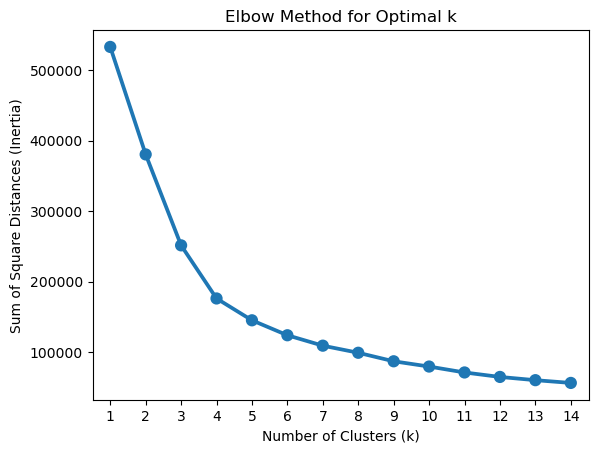

In [234]:

# Sum of squared distances for different values of k
sum_of_sq_dist = {}

for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    km = km.fit(X_scaled)  # Use scaled data
    sum_of_sq_dist[k] = km.inertia_

# Plotting the Elbow Method graph
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

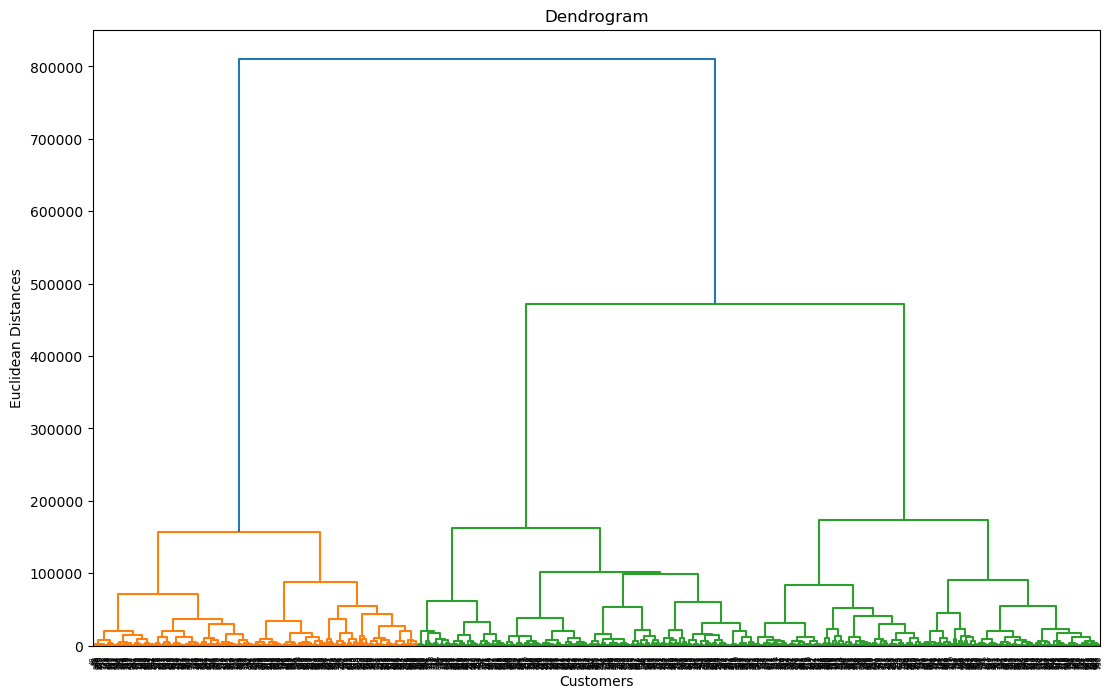

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plotting the Dendrogram for hierarchical clustering
plt.figure(figsize=(13, 8))
dendrogram = sch.dendrogram(sch.linkage(subset_data, method='ward'))  # 'ward' minimizes variance within clusters
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [233]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


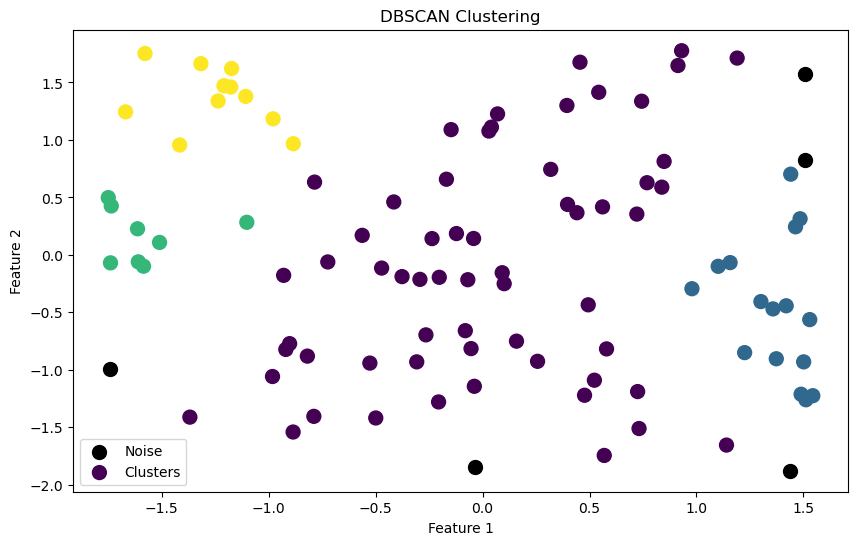

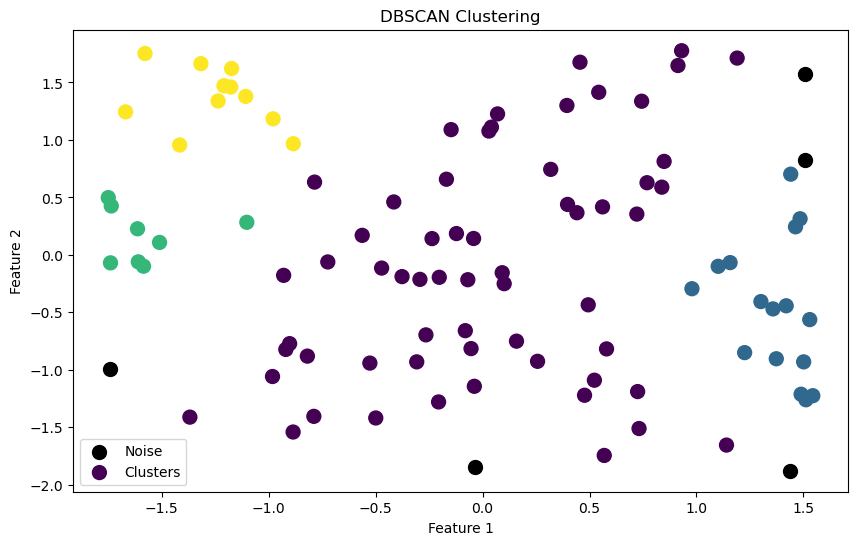

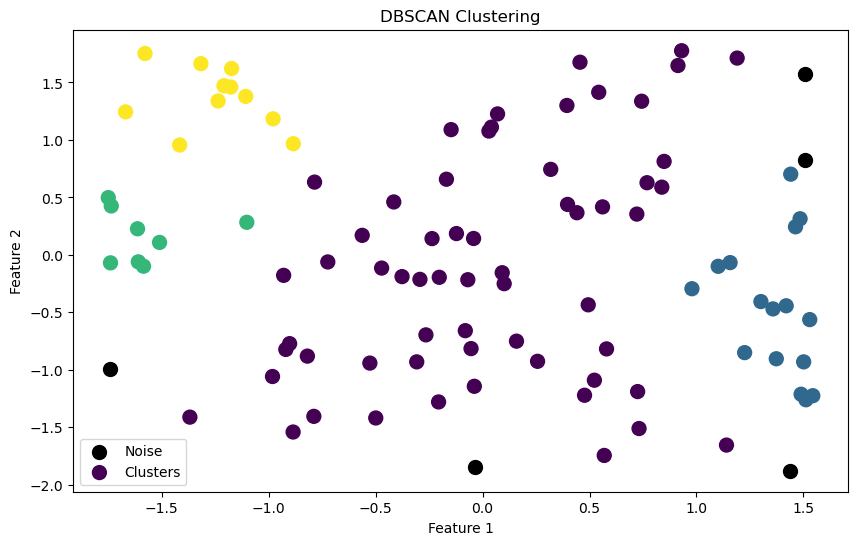

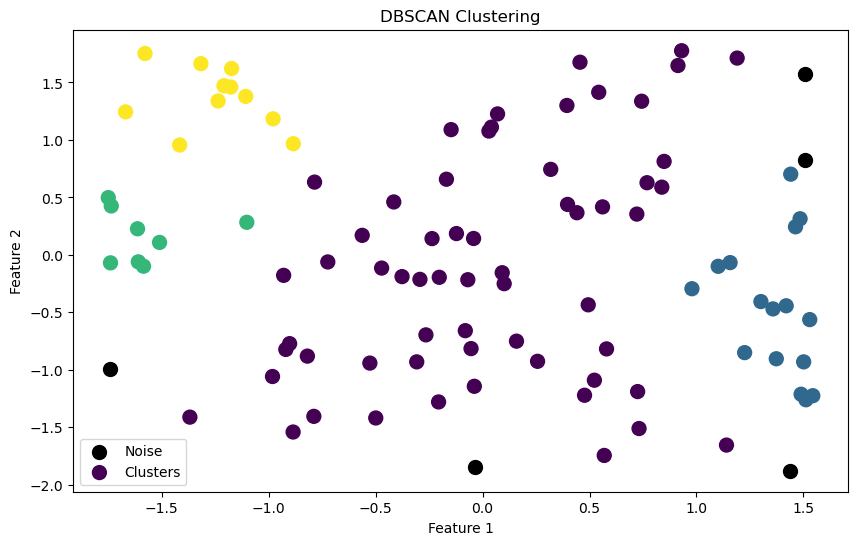

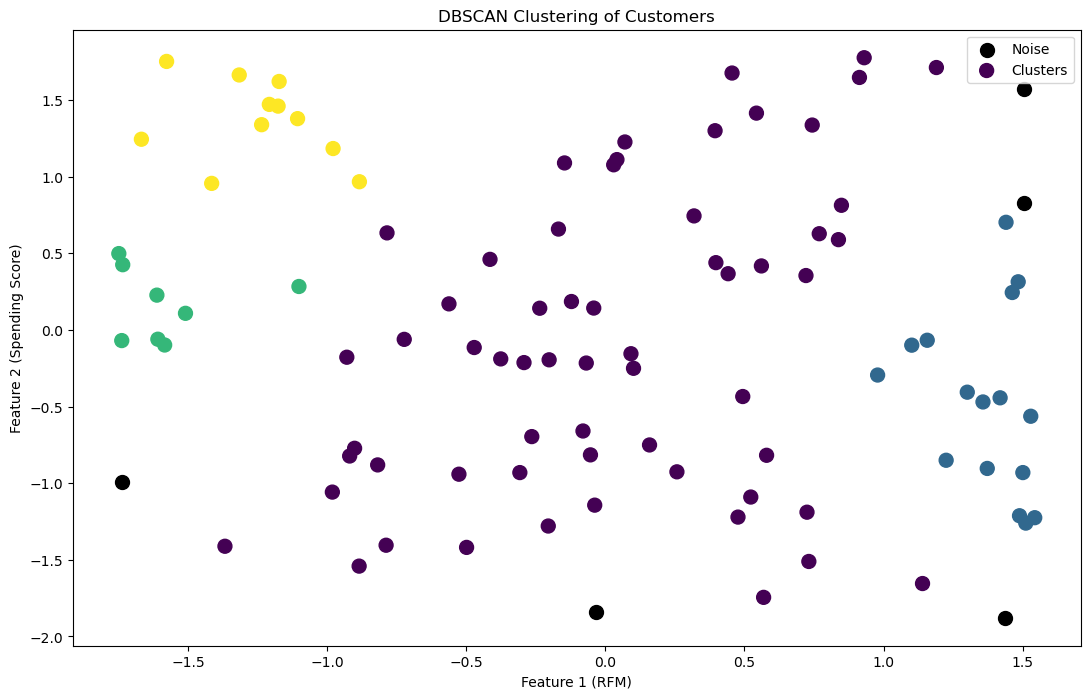

In [252]:
from sklearn.cluster import DBSCAN
ddbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(13, 8))

# Plotting the results
plt.scatter(X_scaled[y_dbscan == -1, 0], X_scaled[y_dbscan == -1, 1], s=100, c='black', label='Noise')  # Noise points
plt.scatter(X_scaled[y_dbscan != -1, 0], X_scaled[y_dbscan != -1, 1], s=100, c=y_dbscan[y_dbscan != -1], cmap='viridis', label='Clusters')

plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Feature 1 (RFM)')
plt.ylabel('Feature 2 (Spending Score)')
plt.legend()
plt.show()

In [254]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = pd.read_csv('bank_transactions.csv')  # Replace with your actual dataset path

# Preprocessing steps (Example: encoding gender or other categorical features)
data['CustGender'] = data['CustGender'].map({'Male': 1, 'Female': 0})

# Assume we are predicting a binary target like 'Fraud' or 'Churn' in this case
# You can replace 'Fraud' with the actual target column in your dataset
data['Fraud'] = data['Fraud'].map({'Yes': 1, 'No': 0})  # Replace with your target column if needed

# Selecting features for prediction (modify as needed)
features = ['Age', 'CustAccountBalance', 'TransactionAmount (INR)', 'CustGender', 'TransactionDay', 'TransactionMonth']
X = data[features]
y = data['Fraud']  # Target column (adjust as per your dataset)

# Balance the dataset using SMOTE (if there’s an imbalance in classes)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier (you can use any model)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_fraud(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Fraudulent" if prediction[0] == 1 else "Not Fraudulent"

# Streamlit app
st.title("Bank Customer Fraud Prediction")

# Input fields (Modify the fields based on your dataset)
age = st.number_input("Age", min_value=18, max_value=100, value=30)
account_balance = st.number_input("Account Balance (INR)", min_value=0.0, max_value=1000000.0, value=50000.0)
transaction_amount = st.number_input("Transaction Amount (INR)", min_value=0.0, max_value=100000.0, value=1000.0)
gender = st.selectbox("Gender", ["Male", "Female"])
transaction_day = st.number_input("Transaction Day (0-6 for Monday-Sunday)", min_value=0, max_value=6, value=0)
transaction_month = st.number_input("Transaction Month (1-12)", min_value=1, max_value=12, value=1)

# Prepare input data
input_data = {
    'Age': age,
    'CustAccountBalance': account_balance,
    'TransactionAmount (INR)': transaction_amount,
    'CustGender': 1 if gender == "Male" else 0,
    'TransactionDay': transaction_day,
    'TransactionMonth': transaction_month
}

# Predict button
if st.button("Predict"):
    result = predict_fraud(input_data)
    st.write(f"Fraud Prediction: {result}")


Overwriting app.py
